Importing the required Library

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Import dataset: gdp_1960_2020.csv file

In [28]:
df = pd.read_csv('gdp_1960_2020.csv')

Reading the data

In [29]:
df.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


Narrow down to only show data of the Country Kenya and we will refer that to as Kenya_gdp_data

In [30]:
Kenya_gdp_data=df[df['country']=='Kenya']

Columns view of dataset to know what columns are nessesary for this analysis and remove the rest in the next step

In [31]:
df.columns

Index(['year', 'rank', 'country', 'state', 'gdp', 'gdp_percent'], dtype='object')

In [32]:
Kenya_gdp_data

,year,rank,country,state,gdp,gdp_percent
54,1960,55,Kenya,Africa,791265458,0.000682
157,1961,55,Kenya,Africa,792959472,0.000657
260,1962,55,Kenya,Africa,868111400,0.000657
366,1963,56,Kenya,Africa,926589348,0.000652
471,1964,56,Kenya,Africa,998759333,0.000641
...,...,...,...,...,...,...
9216,2016,70,Kenya,Africa,69188755364,0.000919
9420,2017,69,Kenya,Africa,78965004656,0.000985
9621,2018,66,Kenya,Africa,87778582964,0.001030
9824,2019,65,Kenya,Africa,95503088538,0.001107


In [33]:
Kenya_gdp_data.drop(['rank','state','gdp_percent'], axis = 1, inplace = True)

C:\Users\georg\AppData\Local\Temp\ipykernel_5612\2408759043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kenya_gdp_data.drop(['rank','state','gdp_percent'], axis = 1, inplace = True)


In [8]:
Kenya_gdp_data

,year,country,gdp
54,1960,Kenya,791265458
157,1961,Kenya,792959472
260,1962,Kenya,868111400
366,1963,Kenya,926589348
471,1964,Kenya,998759333
...,...,...,...
9216,2016,Kenya,69188755364
9420,2017,Kenya,78965004656
9621,2018,Kenya,87778582964
9824,2019,Kenya,95503088538


Now we have the necessary data for proper analysis and prediction

Now to view Kenyas GDP From year 1960 to 2020 using barplot

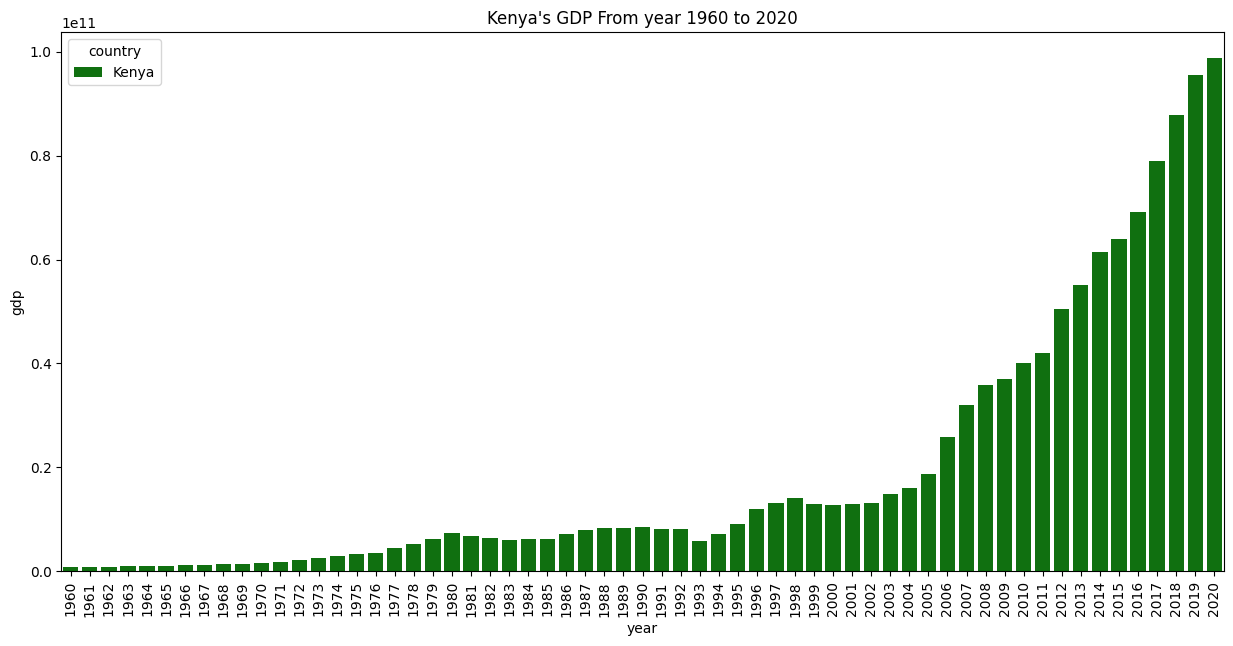

In [34]:
plt.figure(figsize = (15,7))
color = ['green']

sns.barplot(x = 'year',
y = 'gdp',
hue = 'country',
data = Kenya_gdp_data, palette=color)
plt.xticks(rotation = 90)
plt.title("Kenya's GDP From year 1960 to 2020")
plt.show()

Now lets start prediction models

Lets alocate variables data as follows

In [35]:
xx = Kenya_gdp_data.drop(['gdp', 'country'], axis=1)
yy = Kenya_gdp_data['gdp']

Now lets create our linear Regression model

In [36]:
Kenya_gdp_model=LinearRegression()
Kenya_gdp_model.fit(xx,yy)

LinearRegression()

In [37]:
prediction = Kenya_gdp_model.predict(xx)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2)

In [ ]:
Lets Plot using a scatter plot to view Kenyan gdp per year against predicted values

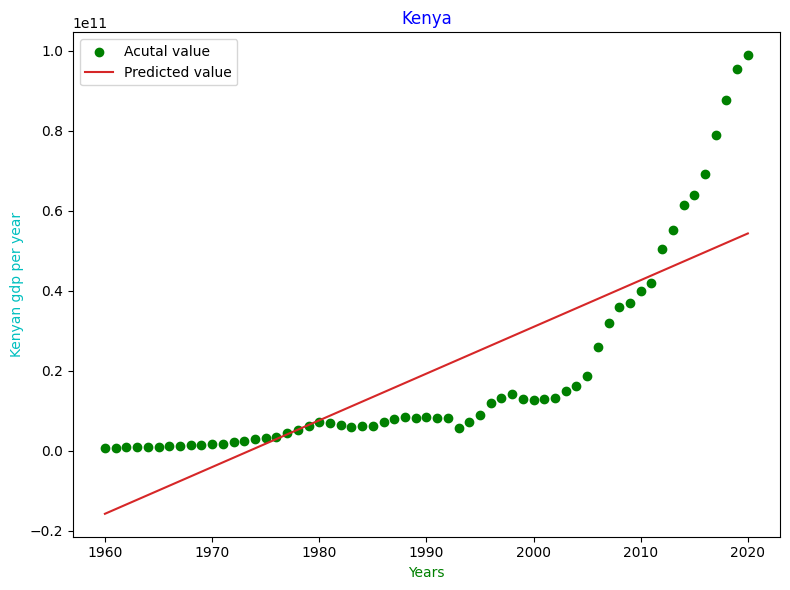

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(xx,yy,label='Acutal value', color='green')
plt.plot(xx,prediction,color='tab:red',label='Predicted value')
plt.legend()
plt.title("Kenya",color='b')
plt.xlabel("Years",color='g')
plt.ylabel("Kenyan gdp per year",color='c')
plt.tight_layout()
plt.show()

In [43]:
years=[2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
for i in years:
    print(Kenya_gdp_model.predict([[i]]))

[5.54827292e+10]
[5.66503214e+10]
[5.78179136e+10]
[5.89855058e+10]
[6.0153098e+10]
[6.13206902e+10]
[6.24882824e+10]
[6.36558747e+10]
[6.48234669e+10]
[6.59910591e+10]


D:\georg\Documents\projects\Kenya_GDP_Analysis_and_prediction\env\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\georg\Documents\projects\Kenya_GDP_Analysis_and_prediction\env\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\georg\Documents\projects\Kenya_GDP_Analysis_and_prediction\env\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\georg\Documents\projects\Kenya_GDP_Analysis_and_prediction\env\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\georg\Documents\projects\Kenya_GDP_Analysis_and_prediction\env\Lib\site-packages\sklearn\base.py:450: Use